In [2]:
import datetime
import os
import numpy
import pandas

#### Data retrieval from yahoo finance

In [ ]:
pip install pandas-datareader --upgrade

In [ ]:
import pandas_datareader as pdr
pdr.__version__

In [ ]:
# retrieve data from yahoo finance
tickers = ['BTC-USD']
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2022, 1, 1)

df = pdr.get_data_yahoo(tickers, start=datetime.datetime(2018, 1, 1), end=datetime.datetime(2020, 12, 2))
df.head()

In [ ]:
df = df.droplevel('Symbols', axis='columns')
df.head()

In [ ]:
df = df.rename_axis(None, axis=1)
df.head()

In [ ]:
df = df.reset_index()
df.head()

#### Data retrieval from csv file

In [3]:
folder_path = r"/content/drive/MyDrive/Laboratorio data analytics/Esempio financial data"
os.chdir(folder_path)

In [ ]:
# retrieve data from csv file
df = pandas.read_csv("BTC-USD_daily.csv")
df.head()

#### Resampling
*   resample day --> week
*   shift -6 day

In [5]:
# Column date must have date format
df['Date'] = pandas.to_datetime(df['Date'])

In [ ]:
df = df.resample('W-TUE', on = 'Date')\
       .agg({'Open': 'first', 'High': 'max', 'Low': 'min' , 'Close': 'last', 'Adj Close': 'last','Volume': 'sum'})\
       .reset_index()
 # 'W' --> 'W-SUN'
df.tail()

In [ ]:
df['Date'] = df['Date'] + pandas.Timedelta(value=-6, unit='D')
df.tail()

In [ ]:
# retrieve data from csv file
os.chdir("/content/drive/MyDrive/Laboratorio data analytics/Esempio financial data")
df_weekly = pandas.read_csv("BTC-USD_weekly.csv")
df_weekly.tail()

#### Plotting

In [ ]:
import matplotlib.pyplot as plt

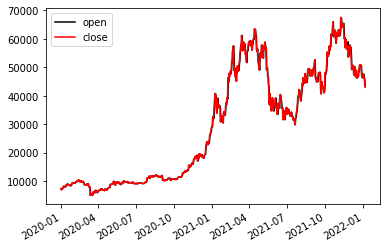

In [ ]:
fig, ax = plt.subplots()
plt.plot(pandas.to_datetime(df['Date']), df['Open'], marker='', linestyle='-', color = 'black', label = 'open')
plt.plot(pandas.to_datetime(df['Date']), df['Close'], marker='', linestyle='-', color = 'red', label = 'close')

fig.autofmt_xdate() # per distanziare automaticamente le date

plt.legend()
plt.show()